#SALARY DATA SVM

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler


from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn .metrics import classification_report

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score


In [2]:
df=pd.read_csv("/content/drive/MyDrive/ass1/SalaryData_Test(1).csv")
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [4]:
df.shape

(15060, 14)

In [5]:
df1=pd.read_csv("/content/drive/MyDrive/ass1/SalaryData_Train(1).csv")

In [6]:
df1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [8]:
df1.shape

(30161, 14)

In [9]:
df1.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

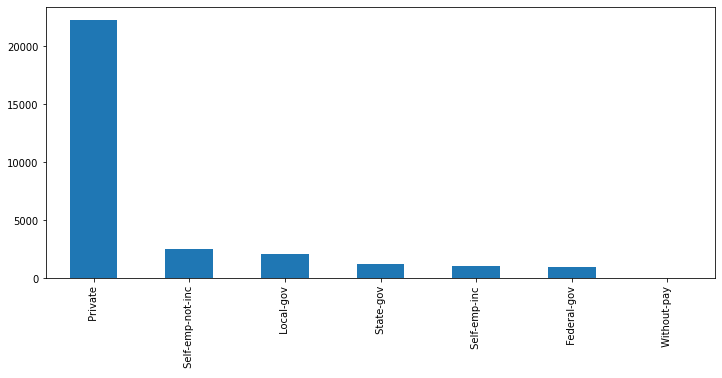

In [10]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(12,5))
df1.workclass.value_counts().plot.bar();

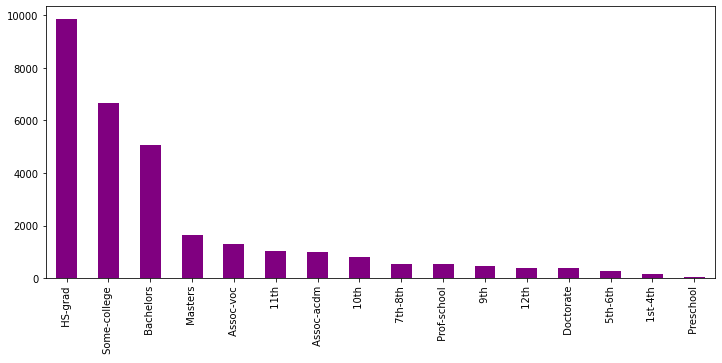

In [11]:
plt.figure(figsize=(12,5))
df1.education.value_counts().plot.bar(color='purple');

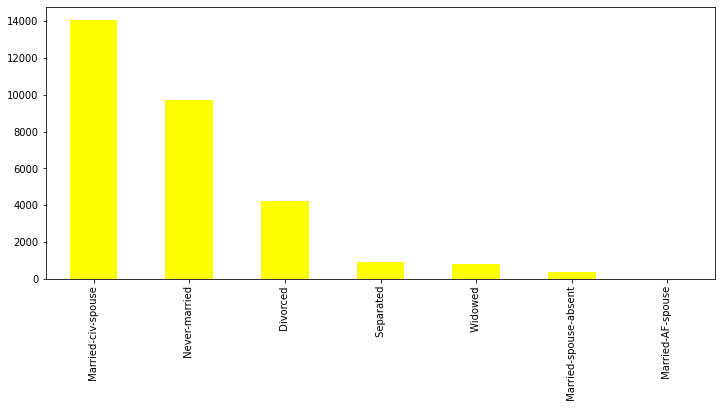

In [12]:
plt.figure(figsize=(12,5))
df1.maritalstatus.value_counts().plot.bar(color='yellow');

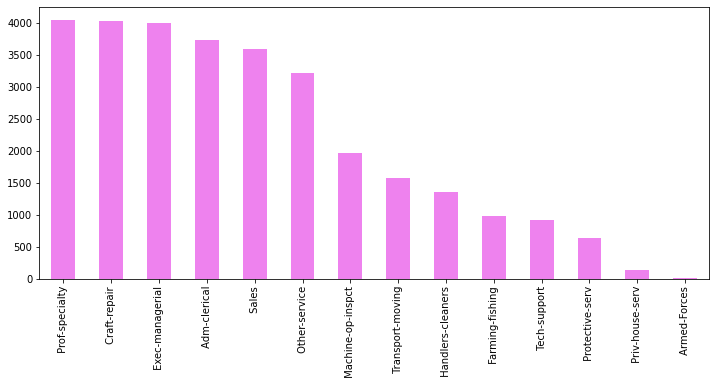

In [13]:
plt.figure(figsize=(12,5))
df1.occupation.value_counts().plot.bar(color='violet');

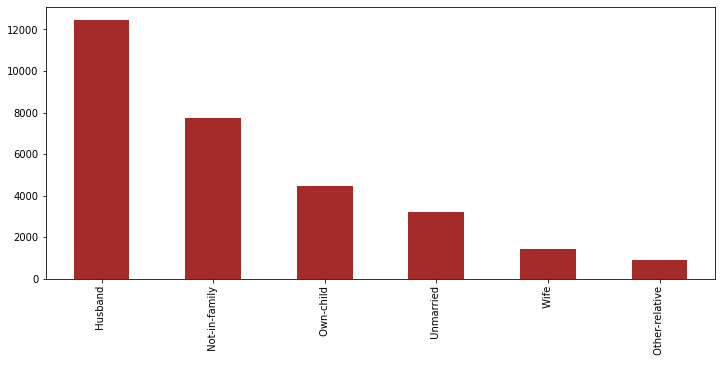

In [14]:
plt.figure(figsize=(12,5))
df1.relationship.value_counts().plot.bar(color='brown');

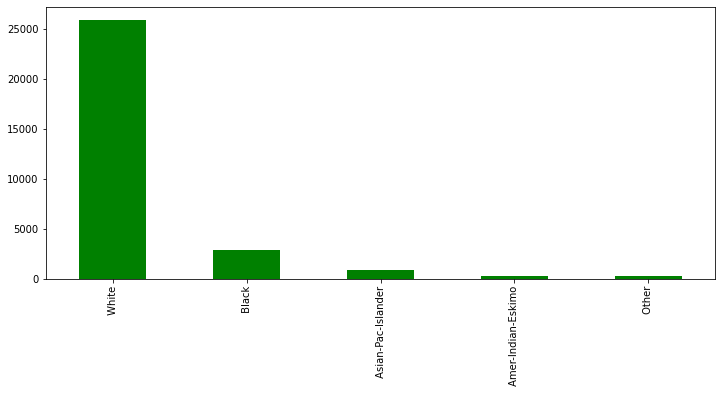

In [15]:
plt.figure(figsize=(12,5))
df1.race.value_counts().plot.bar(color='green');

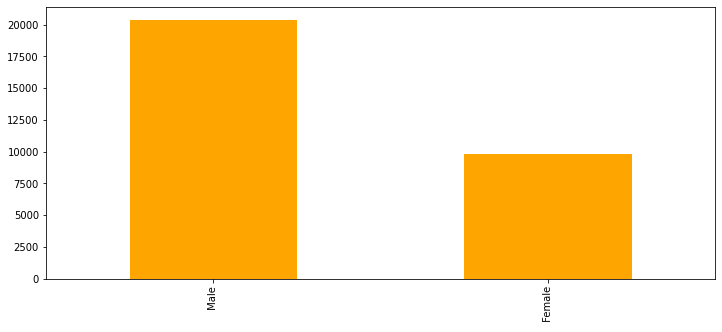

In [16]:
plt.figure(figsize=(12,5))
df1.sex.value_counts().plot.bar(color='orange');

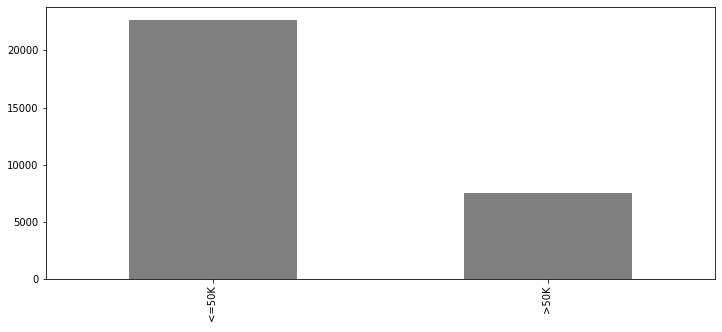

In [17]:
plt.figure(figsize=(12,5))
df1.Salary.value_counts().plot.bar(color='gray');

In [18]:
columns_names=["workclass","education","maritalstatus","occupation","relationship","race","sex","native","Salary"]

In [19]:
from sklearn import preprocessing
number = preprocessing.LabelEncoder()
for i in columns_names:
    df[i] = number.fit_transform(df[i])
    df1[i] = number.fit_transform(df1[i])

colnames = df.columns

In [20]:
df1.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


In [22]:
#Normalization of the data
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler


In [23]:
def norm_func(i):
    x = ( i - i.min()) / ( i.max() - i.min())
    return(x)

In [24]:
norm_data1 = norm_func(df.iloc[:,:])
norm_data1.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,0.109589,0.333333,0.066667,0.400000,0.666667,0.461538,0.6,0.5,1.0,0.000000,0.0,0.397959,0.948718,0.0
1,0.287671,0.333333,0.733333,0.533333,0.333333,0.307692,0.0,1.0,1.0,0.000000,0.0,0.500000,0.948718,0.0
2,0.150685,0.166667,0.466667,0.733333,0.333333,0.769231,0.0,1.0,1.0,0.000000,0.0,0.397959,0.948718,1.0
3,0.369863,0.333333,1.000000,0.600000,0.333333,0.461538,0.0,0.5,1.0,0.076881,0.0,0.397959,0.948718,1.0
4,0.232877,0.333333,0.000000,0.333333,0.666667,0.538462,0.2,1.0,1.0,0.000000,0.0,0.295918,0.948718,0.0


In [25]:
norm_data2= norm_func(df1.iloc[:,:])
norm_data2.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,0.301370,0.833333,0.600000,0.800000,0.666667,0.000000,0.2,1.0,1.0,0.02174,0.0,0.397959,0.948718,0.0
1,0.452055,0.666667,0.600000,0.800000,0.333333,0.230769,0.0,1.0,1.0,0.00000,0.0,0.122449,0.948718,0.0
2,0.287671,0.333333,0.733333,0.533333,0.000000,0.384615,0.2,1.0,1.0,0.00000,0.0,0.397959,0.948718,0.0
3,0.493151,0.333333,0.066667,0.400000,0.333333,0.384615,0.0,0.5,1.0,0.00000,0.0,0.397959,0.948718,0.0
4,0.150685,0.333333,0.600000,0.800000,0.333333,0.692308,1.0,0.5,0.0,0.00000,0.0,0.397959,0.102564,0.0


In [26]:
norm_data1.Salary.value_counts()

0.0    11360
1.0     3700
Name: Salary, dtype: int64

In [27]:
norm_data2.Salary.value_counts()

0.0    22653
1.0     7508
Name: Salary, dtype: int64

In [28]:
# class count
class_count_0, class_count_1 = norm_data1.Salary.value_counts()

In [29]:
print(class_count_0,class_count_1)

11360 3700


In [30]:
data_majority_train = norm_data1[norm_data1.Salary == 0.0]
data_minority_train = norm_data2[norm_data2.Salary == 1.0]

In [31]:
train_major_count = class_count_0

In [32]:
train_minor_count = class_count_1

In [33]:
#class count
class_count_0, class_count_1 = norm_data1.Salary.value_counts()
print(class_count_0,class_count_1)

11360 3700


In [34]:
test_major_count = class_count_0
test_minor_count = class_count_1

In [36]:
from sklearn.utils import resample
majority_downsamp_train = resample(data_majority_train, replace=False,
                                   n_samples=8000, random_state=123)

print(majority_downsamp_train.shape)

(8000, 14)


In [37]:
data_down_sample_train = pd.concat([majority_downsamp_train,data_minority_train])

In [38]:
print (data_down_sample_train.Salary.value_counts())

0.0    8000
1.0    7508
Name: Salary, dtype: int64


In [39]:
majority_downsamp_test = resample(data_majority_test, replace=False,
                                   n_samples=4000, random_state=125)

In [40]:
print (majority_downsamp_test.shape)

(4000, 14)


In [41]:
data_down_sample_test = pd.concat([majority_downsamp_test,data_minority_test])
print (data_down_sample_test.Salary.value_counts())

0.0    4000
1.0    3700
Name: Salary, dtype: int64


In [42]:
XTr = data_down_sample_train.drop(['Salary'],axis=1) 
YTr = data_down_sample_train['Salary']

In [43]:
XTe = data_down_sample_test.drop(['Salary'],axis=1) 
YTe= data_down_sample_test['Salary']

In [44]:
clf = SVC(C= 0.1,kernel='linear')
clf.fit(XTr , YTr)

SVC(C=0.1, kernel='linear')

In [45]:
y_pred = clf.predict(XTe)
acc = accuracy_score(YTe, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(YTe, y_pred)

Accuracy = 75.57142857142857


array([[2890, 1110],
       [ 771, 2929]])

In [46]:
y_pred

array([0., 0., 0., ..., 1., 1., 1.])

In [47]:
clf = SVC(C= 0.1,kernel='poly')
clf.fit(XTr , YTr)
y_pred = clf.predict(XTe)
acc = accuracy_score(YTe, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(YTe, y_pred)

Accuracy = 80.75324675324676


array([[2991, 1009],
       [ 473, 3227]])

In [48]:
y_pred

array([0., 0., 0., ..., 1., 1., 1.])

In [49]:
clf = SVC(C= 0.1,kernel='rbf')
clf.fit(XTr , YTr)
y_pred = clf.predict(XTe)
acc = accuracy_score(YTe, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(YTe, y_pred)

Accuracy = 78.74025974025975


array([[2870, 1130],
       [ 507, 3193]])

In [50]:
y_pred

array([0., 0., 0., ..., 1., 1., 1.])

In [51]:
XTrain = norm_data2.iloc[:,0:13]
YTrain = norm_data2['Salary']

In [52]:
XTest = norm_data1.iloc[:,0:13]
YTest = norm_data1['Salary']

In [53]:
import imblearn
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [54]:
smote = SMOTE(random_state=0)
X_smote_train, Y_smote_train = smote.fit_resample(XTrain, YTrain)
pd.Series(Y_smote_train).value_counts()

0.0    22653
1.0    22653
Name: Salary, dtype: int64

In [55]:
print (pd.Series(Y_smote_train).value_counts())
XTrain = X_smote_train
YTrain = Y_smote_train

0.0    22653
1.0    22653
Name: Salary, dtype: int64


In [56]:
X_smote_test, Y_smote_test = smote.fit_resample(XTest, YTest)
pd.Series(Y_smote_test).value_counts()

0.0    11360
1.0    11360
Name: Salary, dtype: int64

In [57]:
print (pd.Series(Y_smote_test).value_counts())
XTest = X_smote_test
YTest = Y_smote_test

0.0    11360
1.0    11360
Name: Salary, dtype: int64


In [58]:
clf = SVC(C= 0.1,kernel='linear')
clf.fit(XTrain , YTrain)
y_pred = clf.predict(XTest)
acc = accuracy_score(YTest, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(YTest, y_pred)

Accuracy = 75.98591549295774


array([[8273, 3087],
       [2369, 8991]])

In [59]:
y_pred


array([0., 1., 1., ..., 0., 0., 1.])

In [60]:
clf = SVC(C= 0.1,kernel='poly')
clf.fit(XTrain , YTrain)
y_pred = clf.predict(XTest)
acc = accuracy_score(YTest, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(YTest, y_pred)

Accuracy = 81.48327464788733


array([[8625, 2735],
       [1472, 9888]])

In [61]:
y_pred

array([0., 1., 1., ..., 0., 0., 1.])

In [62]:
clf = SVC(C= 0.1,kernel='rbf')
clf.fit(XTrain , YTrain)
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = clf.predict(XTest)
acc = accuracy_score(YTest, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(YTest, y_pred)

Accuracy = 80.29049295774648


array([[8350, 3010],
       [1468, 9892]])

In [63]:
y_pred

array([0., 1., 1., ..., 0., 0., 1.])

#FORESTFIRE SVM

In [64]:
df=pd.read_csv("/content/drive/MyDrive/ass1/forestfires.csv")

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [66]:
df.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [67]:
df = df.drop(['month'], axis=1)
df = df.drop(['day'], axis=1)

In [68]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [69]:
df['size_category'] = le.fit_transform(df['size_category'].astype(str))

In [70]:
df.tail()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1
516,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00,0,...,0,0,0,0,0,0,1,0,0,1


In [71]:
X = df.iloc[:,0:28]
X

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
y = df.iloc[:,28]
y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int64

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [74]:
model = SVC()

In [75]:
model.fit(X_train,y_train)

SVC()

In [76]:
predictions = model.predict(X_test)

In [77]:
print(confusion_matrix(y_test,predictions))

[[  5  44]
 [  0 107]]


In [78]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.10      0.19        49
           1       0.71      1.00      0.83       107

    accuracy                           0.72       156
   macro avg       0.85      0.55      0.51       156
weighted avg       0.80      0.72      0.63       156



In [79]:
from sklearn.model_selection import GridSearchCV
clf = SVC()
param_grid = [{'kernel':['rbf','poly','linear'],'gamma':[100,50,10,0.5],'C':[10,0.1,15] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X_train,y_train)


GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [10, 0.1, 15], 'gamma': [100, 50, 10, 0.5],
                          'kernel': ['rbf', 'poly', 'linear']}])

In [80]:
gsv.best_params_ , gsv.best_score_

({'C': 0.1, 'gamma': 100, 'kernel': 'linear'}, 0.9834084084084085)

In [81]:
clf = SVC(C= 0.1,kernel='linear')
clf.fit(X_train , y_train)

SVC(C=0.1, kernel='linear')

In [82]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 98.07692307692307


array([[ 49,   0],
       [  3, 104]])

In [83]:
y_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1])